In [28]:
from pathlib import Path
import numpy as np
from halo import read_halocat, read_halomemcat, read_haloqcat, Halos

CWD = Path.cwd()
WD = CWD / "Run_multi" / "Run1"
step_numbers_of_interest = np.array([28, 64, 91, 127, 189])
step_numbers = np.array([19, 28, 37, 46, 55, 64, 73, 82, 91, 100, 109, 118, 127, 136, 145, 154, 163, 172, 182, 189])

masses_list, redshifts = [], []
for j in range(5):
    masses = []
    for i in range(10):
        if i+1 == 3:
            pass
        else:
            step_number = step_numbers_of_interest[j]
            WD = Path.cwd() / "Run_multi" / f"Run{i+1}"
            halocatpath = WD / f"FoF_halo_cat.{step_number:05d}"
            haloqcatpath = WD / f"FoFHaloQuantities{step_number:05d}.bin"
            halomemcatpath = WD / f"FoF_member_particle.{step_number:05d}"

            halocat, snapshot_props = read_halocat(halocatpath)
            haloqcat = read_haloqcat(haloqcatpath)
            halomemcat = read_halomemcat(halomemcatpath)
            masses.append(haloqcat["mass"])
    redshifts.append(snapshot_props["amax"]/snapshot_props["anow"]-1)
    masses_list.append(masses)

In [29]:
%matplotlib inline

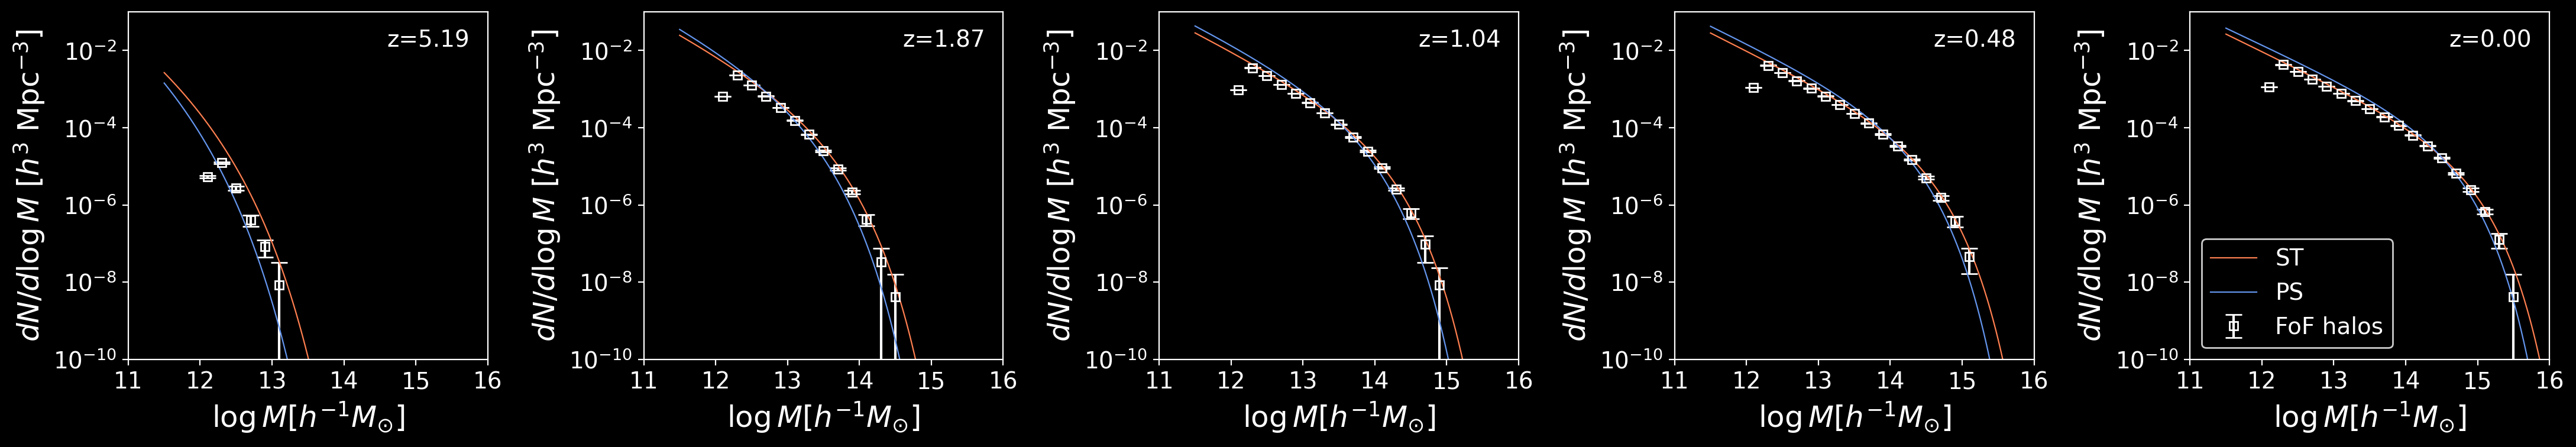

In [43]:
from matplotlib import pyplot as plt
from astropy.table import Table
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 18

bins = np.linspace(np.log(1e12),np.log(1e16),21)
dlnm = np.diff(bins)[0]

fig, axes = plt.subplots(1, 5, figsize=(22,4), facecolor="k", dpi=200)

for j in range(5):
    ax = axes[j]
    masses = masses_list[j]
    step_number = step_numbers_of_interest[j]
    ndlnms = []
    for i in range(9):
        mass = masses[i]
        n, _ = np.histogram(np.log(mass*0.72), bins)
        ndlnm = n/dlnm/512**3
        ndlnms.append(ndlnm)

    ndlnm_median = np.mean(ndlnms, axis=0)
    ndlnm_std = np.std(ndlnms, axis=0)

    x = 0.5*(bins[1:] + bins[:-1])

    ax.errorbar(x/np.log(10), np.log(10)*ndlnm_median, np.log(10)*ndlnm_std,
                c='w', capsize=5, ls='none', ms=5,
                marker='s', mfc='none', label='FoF halos')
    ax.set_yscale('log')
    ax.set_xlabel('$\log M [h^{-1} M_{\odot}]$')
    ax.set_ylabel('$dN/d\log M$ [$h^{3}$ Mpc$^{-3}$]')

    from astropy.cosmology import LambdaCDM
    from hmf import cosmo, MassFunction
    cosmo_params = {"Om0":0.3, "H0":72, "Ode0":0.7, "Ob0":0.044, "to_nonflat":True,
                    }
    mftn_kwargs = {"Mmin":11.5, "Mmax":16}
    mfPS = MassFunction(z=redshifts[j], cosmo_params=cosmo_params, hmf_model="PS", **mftn_kwargs)
    mfST = MassFunction(z=redshifts[j], cosmo_params=cosmo_params, hmf_model="ST", **mftn_kwargs)
    mfJenkins = MassFunction(z=redshifts[j], cosmo_params=cosmo_params, hmf_model="Jenkins", **mftn_kwargs)
    ax.plot(np.log10(mfST.m), np.log(10)*mfST.dndlnm, c='coral', lw=0.8, label='ST')
    ax.plot(np.log10(mfPS.m), np.log(10)*mfPS.dndlnm, c='cornflowerblue', lw=0.8, label='PS')
    ax.set_facecolor('k')
    ax.xaxis.label.set_color('w')
    ax.yaxis.label.set_color('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.tick_params(axis='both', colors='w')
    ax.set_xlim(11, 16)
    ax.set_ylim(1e-10,1e-1)
    ax.text(0.95, 0.95, f"z={redshifts[j]:.2f}", transform=ax.transAxes, color='w', va='top', ha='right')
    if j == 4:
        legend = ax.legend(labelcolor='w')
        frame = legend.get_frame()
        frame.set_facecolor('none')
        frame.set_edgecolor('white')

fig.tight_layout()

In [27]:
redshifts

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:


dir(MassFunction())   


['M',
 'Mmax',
 'Mmin',
 '_MassFunction__Mmax',
 '_MassFunction__Mmin',
 '_MassFunction__cosmo_model',
 '_MassFunction__cosmo_params',
 '_MassFunction__delta_c',
 '_MassFunction__delta_h',
 '_MassFunction__delta_wrt',
 '_MassFunction__dlnk',
 '_MassFunction__dlog10m',
 '_MassFunction__filter_model',
 '_MassFunction__filter_params',
 '_MassFunction__growth_model',
 '_MassFunction__growth_params',
 '_MassFunction__hmf_model',
 '_MassFunction__hmf_params',
 '_MassFunction__lnk_max',
 '_MassFunction__lnk_min',
 '_MassFunction__n',
 '_MassFunction__recalc',
 '_MassFunction__recalc_par_prop',
 '_MassFunction__recalc_prop_par',
 '_MassFunction__recalc_prop_par_static',
 '_MassFunction__sigma_8',
 '_MassFunction__takahashi',
 '_MassFunction__transfer_model',
 '_MassFunction__transfer_params',
 '_MassFunction__z',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__